In [13]:
import tensorflow as tf
import os
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadrehan00/chest-xray-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/jonathanpoffenberger/.cache/kagglehub/datasets/muhammadrehan00/chest-xray-dataset/versions/1


In [15]:
train_dir=os.path.join(path,'train')
test_dir=os.path.join(path,'test')
valdir=os.path.join(path,'val')

In [16]:
train_data =image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)
test_data=image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)
val_data=image_dataset_from_directory(
    valdir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)

Found 20450 files belonging to 3 classes.
Found 2569 files belonging to 3 classes.
Found 2569 files belonging to 3 classes.
Found 2534 files belonging to 3 classes.
Found 2534 files belonging to 3 classes.


In [17]:
# Rescale pixel values - apply normalization directly
train_data = train_data.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))
test_data = test_data.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))
val_data = val_data.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))

# Apply data augmentation to training data only
def augment_data(images, labels):
    # Random horizontal flip
    images = tf.image.random_flip_left_right(images)
    # Random rotation
    images = tf.image.rot90(images, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    return images, labels

train_data = train_data.map(augment_data)

In [18]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)),
    MaxPooling2D((2,2)),
    Dropout(0.1),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.01),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(3,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [235]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(train_data, validation_data=val_data, epochs=10, callbacks=[early_stop])

Epoch 1/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 281s 438ms/step - accuracy: 0.6952 - loss: 0.6011 - val_accuracy: 0.6989 - val_loss: 0.5498
Epoch 2/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 281s 438ms/step - accuracy: 0.6952 - loss: 0.6011 - val_accuracy: 0.6989 - val_loss: 0.5498
Epoch 2/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 275s 429ms/step - accuracy: 0.7079 - loss: 0.5609 - val_accuracy: 0.7123 - val_loss: 0.5098
Epoch 3/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 275s 429ms/step - accuracy: 0.7079 - loss: 0.5609 - val_accuracy: 0.7123 - val_loss: 0.5098
Epoch 3/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 270s 422ms/step - accuracy: 0.7134 - loss: 0.5437 - val_accuracy: 0.7139 - val_loss: 0.5030
Epoch 4/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 270s 422ms/step - accuracy: 0.7134 - loss: 0.5437 - val_accuracy: 0.7139 - val_loss: 0.5030
Epoch 4/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 271s 423ms/step - accuracy: 0.7232 - loss: 0.5144 - val_accuracy: 0.7305 - val_loss: 0.4836
Epoch 5/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 271s 423ms/step - accuracy: 0.7232 -

Epoch 1/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 281s 438ms/step - accuracy: 0.6952 - loss: 0.6011 - val_accuracy: 0.6989 - val_loss: 0.5498
Epoch 2/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 281s 438ms/step - accuracy: 0.6952 - loss: 0.6011 - val_accuracy: 0.6989 - val_loss: 0.5498
Epoch 2/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 275s 429ms/step - accuracy: 0.7079 - loss: 0.5609 - val_accuracy: 0.7123 - val_loss: 0.5098
Epoch 3/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 275s 429ms/step - accuracy: 0.7079 - loss: 0.5609 - val_accuracy: 0.7123 - val_loss: 0.5098
Epoch 3/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 270s 422ms/step - accuracy: 0.7134 - loss: 0.5437 - val_accuracy: 0.7139 - val_loss: 0.5030
Epoch 4/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 270s 422ms/step - accuracy: 0.7134 - loss: 0.5437 - val_accuracy: 0.7139 - val_loss: 0.5030
Epoch 4/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 271s 423ms/step - accuracy: 0.7232 - loss: 0.5144 - val_accuracy: 0.7305 - val_loss: 0.4836
Epoch 5/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 271s 423ms/step - accuracy: 0.7232 -

In [242]:
test_loss, test_acc = model.evaluate(test_data)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - accuracy: 0.7458 - loss: 0.4467

Test Accuracy: 0.7458
Test Loss: 0.4467
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - accuracy: 0.7458 - loss: 0.4467

Test Accuracy: 0.7458
Test Loss: 0.4467


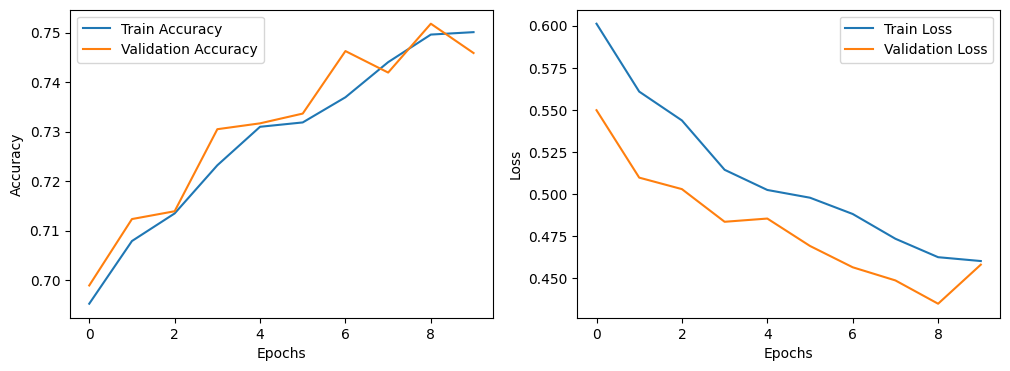

In [243]:
# Graph train and validation accuracy and loss
history = model.history.history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [316]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,015,147 (19.13 MB)

 Trainable params: 1,671,715 (6.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,343,432 (12.75 MB)

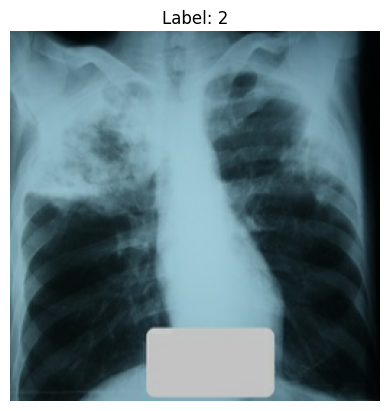

In [372]:
# Get image from dataset
for images, labels in test_data.take(1):
    img = images[0].numpy()
    label = labels[0].numpy()
    plt.imshow(img.squeeze(), cmap='gray' if img.shape[-1]==1 else None)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()


In [373]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.get_layer('dense_3').output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted: 2
Predicted: 2


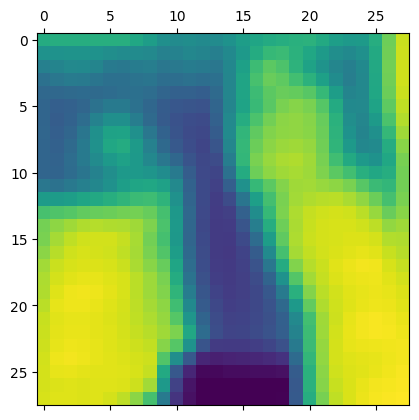

In [374]:
img_array = tf.expand_dims(img, axis=0) / 255.0

# Remove softmax activation
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", tf.argmax(preds[0]).numpy())

last_conv_layer_name = 'conv2d_7'
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

plt.matshow(heatmap)
plt.show()

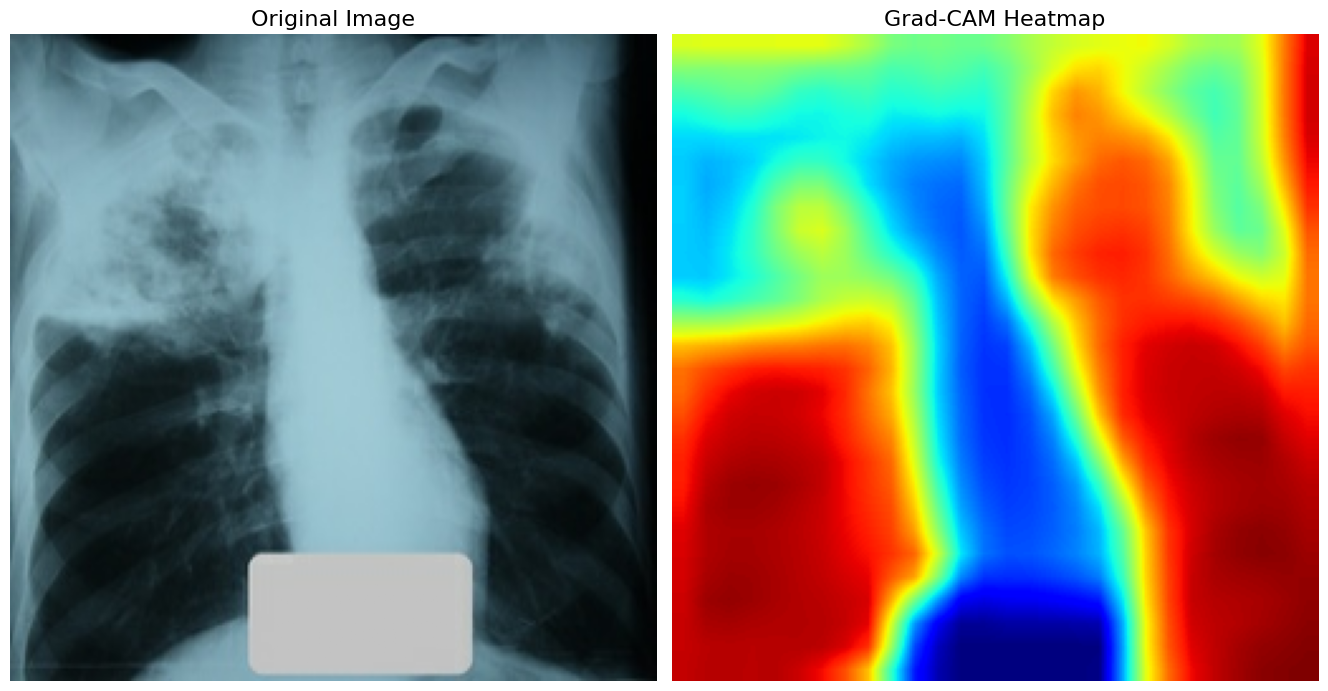

Grad-CAM saved as cam.jpg


In [375]:
def save_and_display_gradcam(image, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Ensure image is properly normalized to 0-1 range
    if image.max() > 1.0:
        img = image.astype(np.float32) / 255.0
    else:
        img = image.astype(np.float32)
    
    # Resize heatmap to match image size
    heatmap_resized = tf.image.resize(
        tf.expand_dims(heatmap, -1), 
        [img.shape[0], img.shape[1]]
    ).numpy().squeeze()
    
    # Apply jet colormap to heatmap properly
    jet = mpl.colormaps["jet"]
    heatmap_colored = jet(heatmap_resized)[:, :, :3]  # Remove alpha channel, keep RGB
    
    # Proper blending: weighted combination
    superimposed_img = heatmap_colored * alpha + img * (1 - alpha)
    
    # Clip values to valid range
    superimposed_img = np.clip(superimposed_img, 0, 1)
    
    # Display results with matplotlib (large figure)
    plt.figure(figsize=(20, 8))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Original Image', fontsize=16)
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap_resized, cmap='jet')
    plt.title('Grad-CAM Heatmap', fontsize=16)
    plt.axis('off')
    
    
    plt.tight_layout()
    plt.show()
    
    # Save the result
    plt.imsave(cam_path, superimposed_img)
    print(f"Grad-CAM saved as {cam_path}")

# Call the function
save_and_display_gradcam(img, heatmap)